<a href="https://colab.research.google.com/github/Saleh7127/pytorch-practice/blob/main/simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [72]:
class Model(nn.Module):
  # Input layer (4 features of the IRIS Dataset)
  # Hidden layer 1
  # Hidden Layer 2 ....
  # Output (3 class of IRIS flowers)

  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [73]:
#Pick a manual seed for randomization
torch.manual_seed(32)

#Create the instance of the model
model = Model()

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [76]:
df['variety'] = df['variety'].replace('Setosa',0.0)
df['variety'] = df['variety'].replace('Versicolor',1.0)
df['variety'] = df['variety'].replace('Virginica',2.0)
df

<ipython-input-76-018f28ba7d68>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [77]:
X = df.drop('variety', axis=1)
y = df['variety']

In [78]:
X = X.values
y = y.values

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [81]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [82]:
# Convert y target to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [83]:
# Set the criteria to evaluate the model
criterion = nn.CrossEntropyLoss()

# Choose optimizer, learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [84]:
epochs = 200
losses = []

for i in range(epochs):
  # Go foward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error
  loss = criterion(y_pred, y_train)

  # Keep track of the losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch : {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 0 and loss: 1.0657143592834473
Epoch : 10 and loss: 0.8564555644989014
Epoch : 20 and loss: 0.7419444918632507
Epoch : 30 and loss: 0.6647117733955383
Epoch : 40 and loss: 0.5818847417831421
Epoch : 50 and loss: 0.47264382243156433
Epoch : 60 and loss: 0.2868303656578064
Epoch : 70 and loss: 0.1305440068244934
Epoch : 80 and loss: 0.07406147569417953
Epoch : 90 and loss: 0.05346407741308212
Epoch : 100 and loss: 0.04344853386282921
Epoch : 110 and loss: 0.03756030276417732
Epoch : 120 and loss: 0.03357869014143944
Epoch : 130 and loss: 0.030629698187112808
Epoch : 140 and loss: 0.028308110311627388
Epoch : 150 and loss: 0.026401540264487267
Epoch : 160 and loss: 0.024792468175292015
Epoch : 170 and loss: 0.023403875529766083
Epoch : 180 and loss: 0.022187260910868645
Epoch : 190 and loss: 0.021108437329530716


Text(0, 0.5, 'Loss/error')

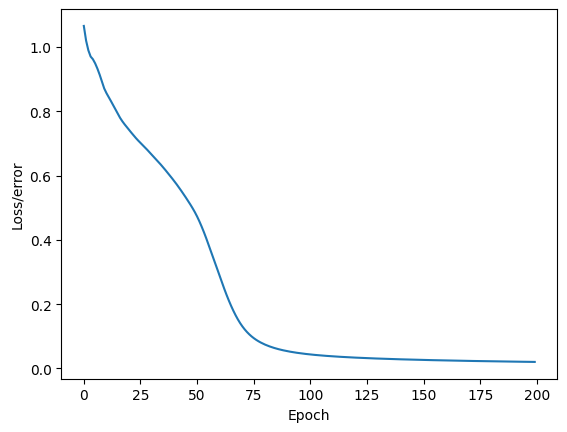

In [85]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss/error')

In [86]:
# Evaluate

with torch.no_grad(): # Turn off the backpropagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [87]:
loss

tensor(0.1659)

In [88]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Type of flower network thinks
    print(f'{i+1}.) {str(y_val)} \t Org: {y_test[i]} \t Pred: {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct+=1


print(f'Correct: {correct}')

1.) tensor([-7.7659,  3.4264,  8.1375]) 	 Org: 2 	 Pred: 2
2.) tensor([-9.6862,  0.5559, 13.7157]) 	 Org: 2 	 Pred: 2
3.) tensor([-10.7305,   1.9054,  13.8487]) 	 Org: 2 	 Pred: 2
4.) tensor([-4.8899,  7.4888, -0.1201]) 	 Org: 1 	 Pred: 1
5.) tensor([-8.9513,  2.5957, 10.5768]) 	 Org: 2 	 Pred: 2
6.) tensor([-3.2242,  6.6918, -1.4634]) 	 Org: 1 	 Pred: 1
7.) tensor([-7.3448,  4.2663,  6.6128]) 	 Org: 2 	 Pred: 2
8.) tensor([-4.2506,  6.9602, -0.4524]) 	 Org: 1 	 Pred: 1
9.) tensor([-8.0198,  3.3808,  8.4387]) 	 Org: 2 	 Pred: 2
10.) tensor([-10.1154,   0.5045,  14.3354]) 	 Org: 2 	 Pred: 2
11.) tensor([-6.8310,  4.4224,  5.6722]) 	 Org: 2 	 Pred: 2
12.) tensor([ 5.0235, -3.3205, -4.1701]) 	 Org: 0 	 Pred: 0
13.) tensor([ 4.5857, -2.9683, -3.8125]) 	 Org: 0 	 Pred: 0
14.) tensor([-2.0757,  5.1354, -1.5990]) 	 Org: 1 	 Pred: 1
15.) tensor([ 3.9804, -2.1297, -3.7460]) 	 Org: 0 	 Pred: 0
16.) tensor([-6.7862,  5.4199,  4.6394]) 	 Org: 2 	 Pred: 1
17.) tensor([ 4.4022, -2.6556, -3.8509]) 	 

In [90]:
# Create new data and test

new_iris = torch.tensor([4.7, 3.4, 1.3, 0.2])

In [91]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.9929, -3.3347, -4.1031])


In [92]:
# Save the NN model

torch.save(model.state_dict(), 'simple_nn_for_iris_model.pt')

In [94]:
new_model = Model()
new_model.load_state_dict(torch.load('simple_nn_for_iris_model.pt'))

<All keys matched successfully>

In [95]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

In [96]:
iris1 = torch.tensor([4.7, 3.4, 1.3, 0.2])
print(new_model(new_iris))

tensor([ 4.9929, -3.3347, -4.1031], grad_fn=<ViewBackward0>)
